In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [70]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [71]:
diabdata.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [72]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [101]:
# change diabetic to 0 and 1
diabdata = diabdata.replace({'Diabetic': {'yes': 1, 'no': 0}})
diabdata.Diabetic

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 952, dtype: object

In [80]:
# total rows(observations) and columns(attributess)
diabdata.shape

(952, 18)

In [81]:
# summary statistics for quantiative variables
diabdata.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


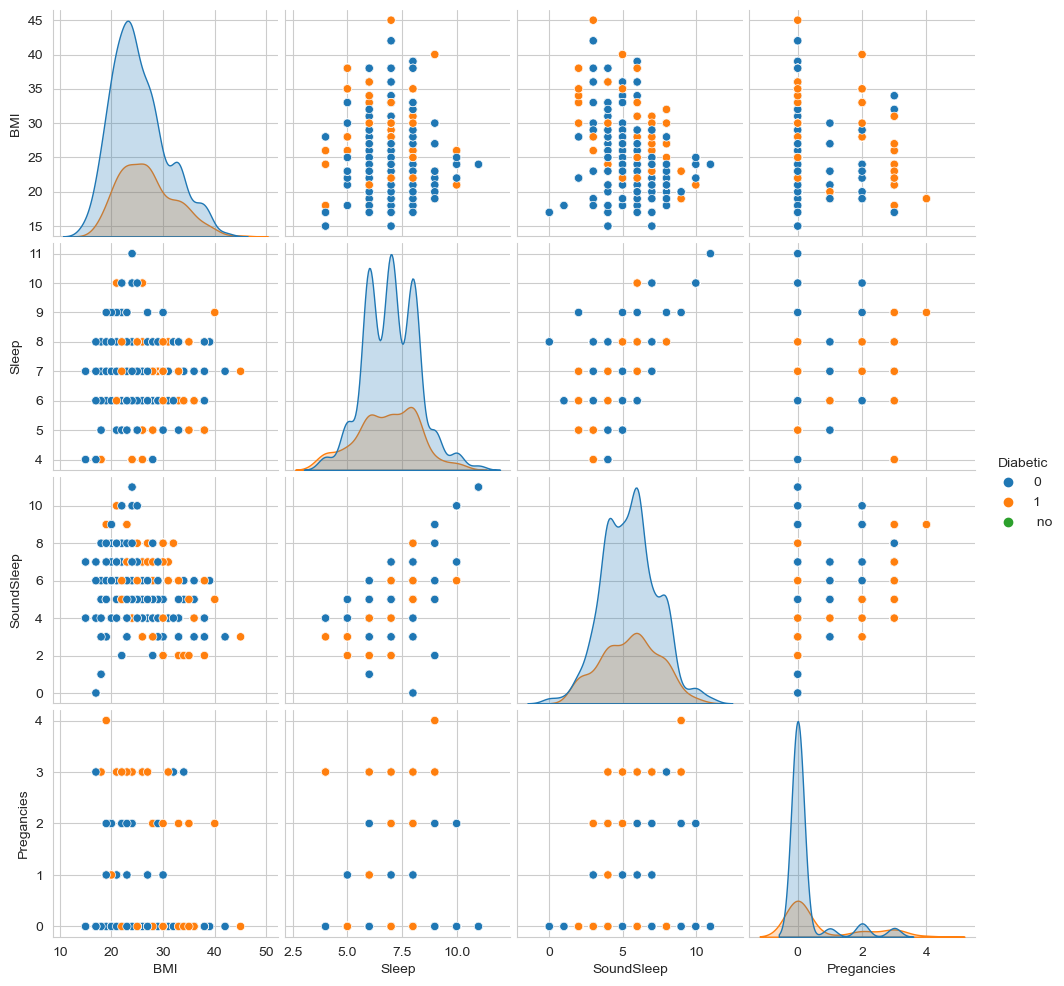

In [96]:
# pair plot
sns.pairplot(diabdata, hue = "Diabetic")

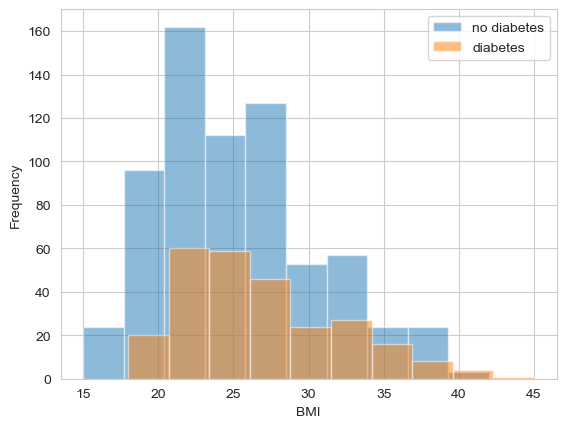

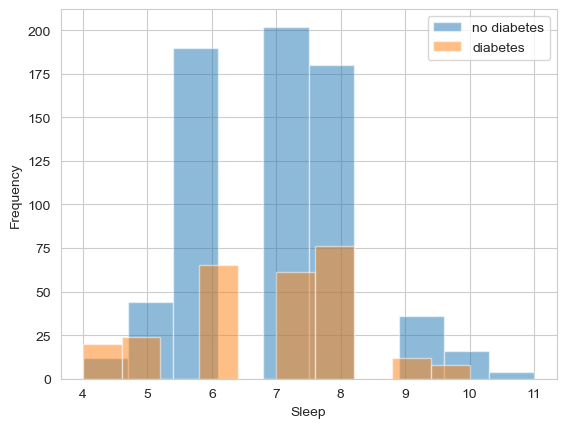

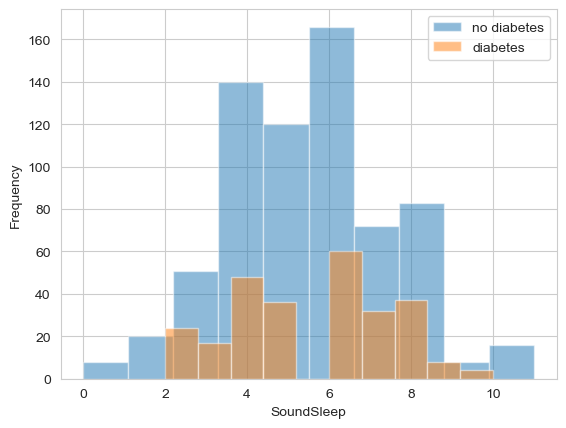

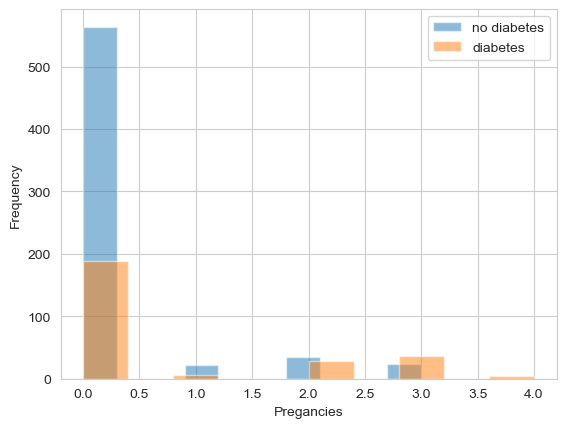

In [97]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata[diabdata['Diabetic'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata[diabdata['Diabetic'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic', ylabel='count'>

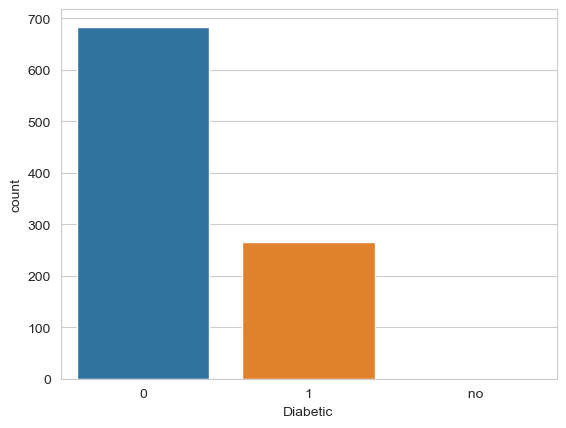

In [85]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic', data = diabdata)
# not sure why there is 2 separate No

C:\Users\hyuna\AppData\Local\Temp\ipykernel_1816\533892526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabdata.corr(), annot = True)


<Axes: >

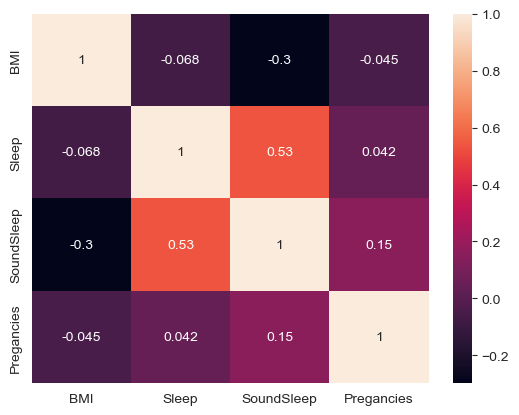

In [88]:
sns.heatmap(diabdata.corr(), annot = True)

In [7]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [8]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [9]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102


In [10]:
diabdata.dropna(subset = ['BMI', 'Sleep', 'SoundSleep'], inplace=True) #drops nan values from quantitative variables for now
diab_quant = diabdata[['BMI', 'Sleep', 'SoundSleep']] #the quantiative variables we want
target = diabdata['Diabetic'] #the label we want to predict
lab_encoder = LabelEncoder() #encode target labels with value between 0 and n_classes-1
target = lab_encoder.fit_transform(target) #transform target lab encoded
#split into 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(diab_quant, target, test_size = 0.2, random_state = 12)
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) #show original yes/no's instead of 1/2's
predicted = lab_encoder.inverse_transform(y_pred)
true = lab_encoder.inverse_transform(y_test)
for pred, true in zip(predicted, true):
    print(f"Predicted: {pred}\tTrue: {true}")

Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: yes
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: no	True: no
Predicted: no	True: no
Predicted: yes	True: yes
Predicted: no	True: no
Predicted: no	True: yes
Predicted: no	True: no
Predicted: n

In [11]:
true_labs = lab_encoder.inverse_transform(y_test) #there was an issue if I didn't inverse transform
predicted = predicted
conf_mat = confusion_matrix(true_labs, predicted)
conf_mat

array([[121,  18],
       [ 23,  28]], dtype=int64)

In [12]:
acc_sco = accuracy_score(true_labs, predicted)
acc_sco

0.7842105263157895

In [13]:
XMLP = diabdata.drop('Diabetic', axis=1)
yMLP = diabdata['Diabetic']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9631578947368421

In [32]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

c:\Users\jpsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.02, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.922168002788428


[7.33986837] [[-0.01601273]]
Degree  1  Training RMSE:  1.2666461664387465
Training R2:  0.005187042859310598
[7.33986837] [[-0.01601273]]
Degree  1  Testing RMSE:  1.2898506872754183
Testing R2:  -0.015662830974160435


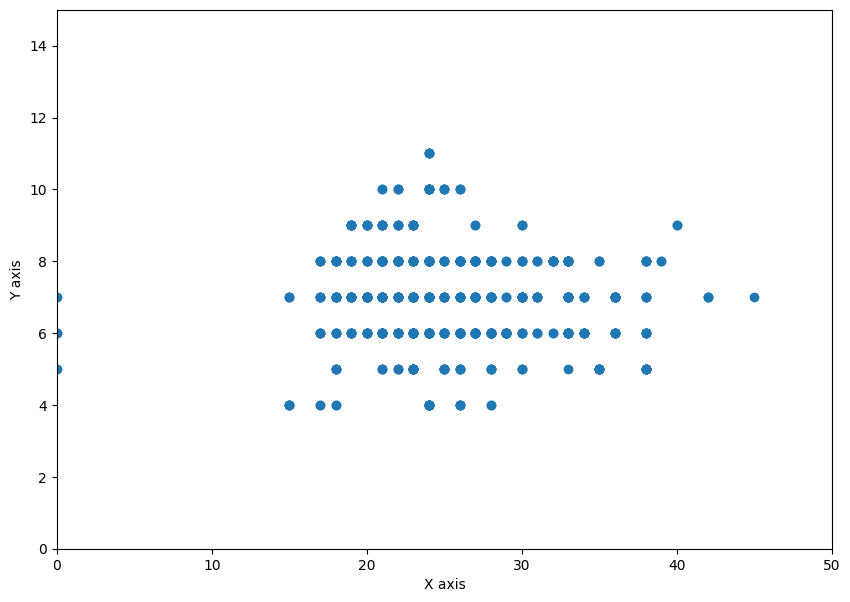

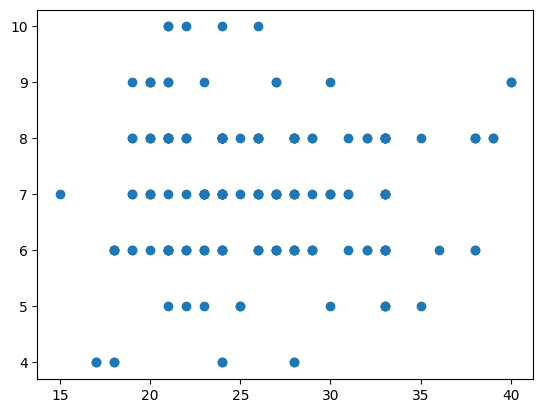

[6.17310614] [[ 0.0784566  -0.00181925]]
Degree  2  Training RMSE:  1.2617115100016216
Training R2:  0.012923217057146719
[6.17310614] [[ 0.0784566  -0.00181925]]
Degree  2  Testing RMSE:  1.2944497045391694
Testing R2:  -0.022918520884438243


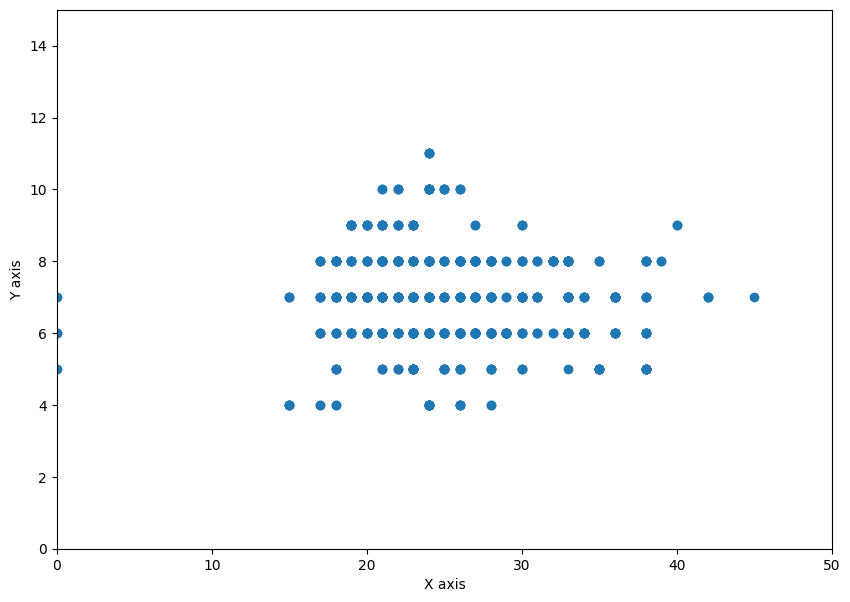

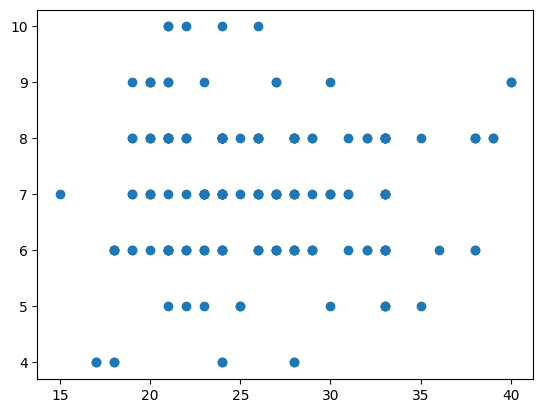

[5.62283175] [[ 1.90766248e-01 -7.68418025e-03  8.85630911e-05]]
Degree  3  Training RMSE:  1.2594685171562126
Training R2:  0.01642962590374264
[5.62283175] [[ 1.90766248e-01 -7.68418025e-03  8.85630911e-05]]
Degree  3  Testing RMSE:  1.289704879967529
Testing R2:  -0.015433218827090922


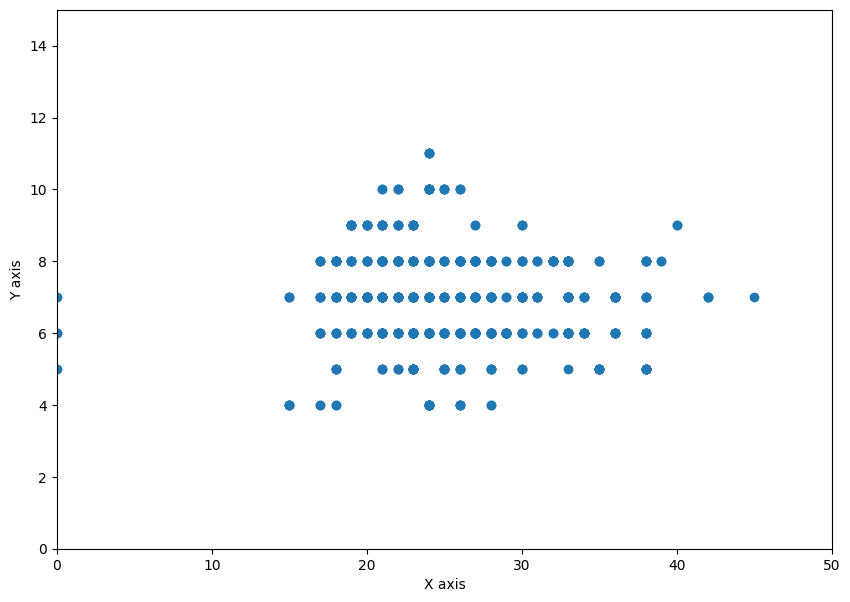

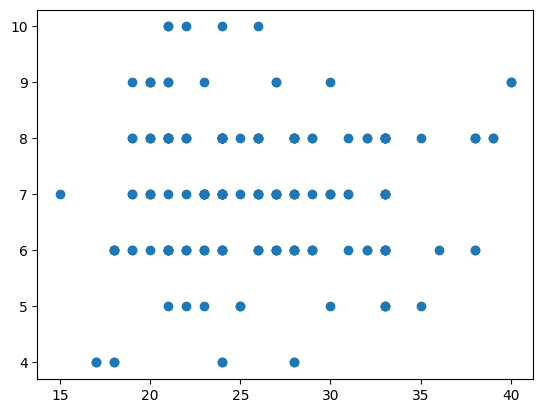

[5.87133334] [[-1.35007718e-01  2.57287255e-02 -1.06066140e-03  1.29033266e-05]]
Degree  4  Training RMSE:  1.2553332380603202
Training R2:  0.022877839098169095
[5.87133334] [[-1.35007718e-01  2.57287255e-02 -1.06066140e-03  1.29033266e-05]]
Degree  4  Testing RMSE:  1.2776339847373364
Testing R2:  0.0034855711619083962


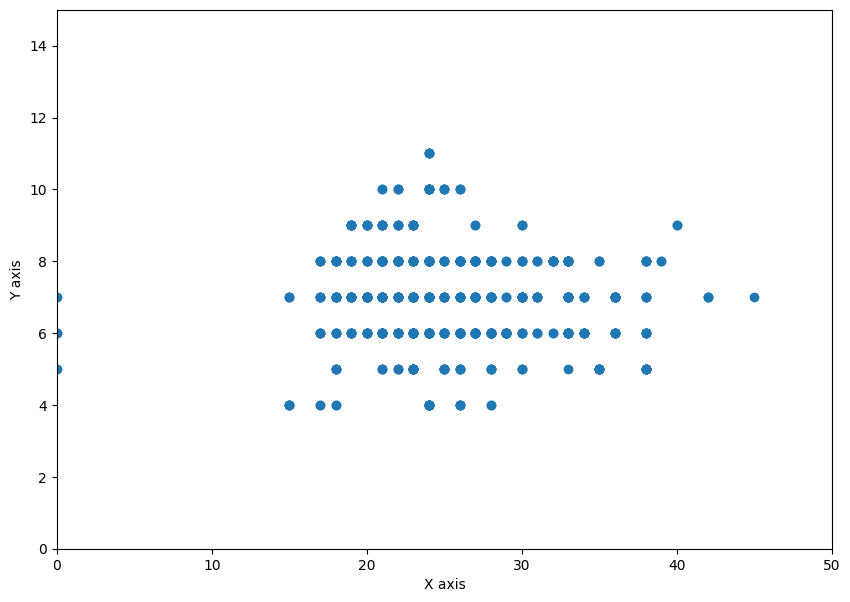

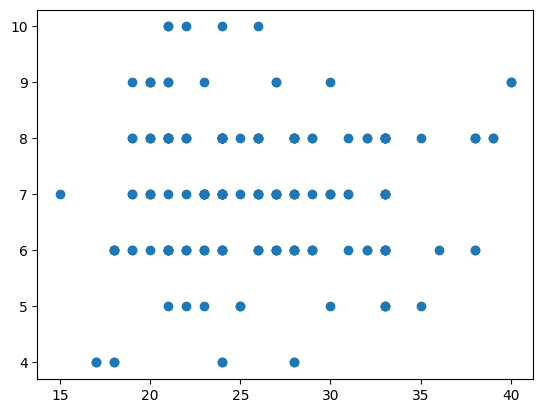

In [24]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df = df.drop(columns=['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'Smoking', 'Alcohol', 'SoundSleep', 'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes', 'UriationFreq', 'Diabetic'])
df = df.sort_values('BMI')
df = df.fillna(0)
train, test = train_test_split(df, test_size=0.2, random_state=21)
train = train.sort_values('BMI')
test = test.sort_values('BMI')
X_train, y_train = train.drop(columns=['Sleep']), train['Sleep']
X_test, y_test = test.drop(columns=['Sleep']), test['Sleep']

for i in range(1,5):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    predicted1 = plr.predict(poly.transform(np.asarray(X_train).reshape(-1, 1)))
    #here is how you get the intercept and the coef.
    print(plr.intercept_, plr.coef_)
    print("Degree " , i , " Training RMSE: " , mean_squared_error(predicted1, np.asarray(y_train).reshape(-1, 1), squared=False))
    print("Training R2: ", r2_score(y_train, predicted1))
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    predicted2 = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))
    #here is how you get the intercept and the coef.
    print(plr.intercept_, plr.coef_)
    print("Degree " , i , " Testing RMSE: ", mean_squared_error(predicted2, np.asarray(y_test).reshape(-1, 1), squared=False))
    print("Testing R2: ", r2_score(y_test, predicted2))

    plt.figure(figsize=(10, 7))
    
    # Plot the input data points
    plt.scatter(X_train, y_train)
    
    # Set the x-axis and y-axis limits
    plt.xlim(0, 50)
    plt.ylim(0, 15)
    
    # Construct a string representation of the gradient descent solution using the parameters
    
    # Set the title, x-axis label, and y-axis label for the plot
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    
    # Display the plot
    plt.show()
    
    # Plot the input data points
    plt.scatter(X_test, y_test)
    plt.show()
